# The Embedding Notebook 2
## John E. Inglesfield
This is the second embedding notebook, providing short computer programs to illustrate the embedding method, and to accompany my book *The Embedding Method for Electronic Structure* (ebook ISBN 978-0-7503-1042-0, print ISBN 978-0-7503-1043-7), published in the *Expanding Physics* ebook program by [IOP Publishing](http://iopscience.iop.org/books/iop-expanding-physics). As with the first notebook, this can be used independently of the book, but the references are to chapters, figures, and equations. Atomic units are used throughout, with $e=\hbar=m_e=1$.

This notebook uses the `Numpy`, and `Matplotlib` libraries, as well as the `confinement.py` module in the repository, which itself uses the `Numpy` and `Scipy` libraries. 

In [1]:
import numpy as np
from numpy import sqrt,pi
import matplotlib.pyplot as plt
from scipy.special import jn_zeros
from scipy.optimize import fsolve
import confinement as conf
%matplotlib inline

## Chapter 5 Confined electrons and embedding
In this notebook we turn to calculations of the eigenstates of electrons confined by what is, effectively, an infinite barrier. The confined region constitutes region I, as shown schematically in the following figure (figure 5.1),

<img src=confinement.png width=400 height=400 />

and the very large potential $\mathcal{V}$ (typically $10^{10}$ a.u.) in region II is replaced by an embedding potential $\Sigma$ over $S$. $\Sigma$ is *local* and *energy-independent*, and is given by
$$\Sigma=\sqrt{\frac{\mathcal{V}}{2}}.$$
As a first example we shall take a simple example of figure 5.2, a one-dimensional square well of width $d$ with a very large potential $\mathcal{V}$ on both sides,

<img src=well.png width=500 height=500 />

We expand the even states in region I using the basis set we used in the first notebook for the surface model (compare with figure 2.1, eq. (2.30)),
$$\chi_n(z)=\cos(n\pi z/D),\quad n=0,2,4\ldots.$$
The input parameters are `v`, `d`, and `D`, for $\mathcal{V}$, $d$, and $D$ as defined on the figure, and the number of basis functions `n_max`. We should choose `D` > `d`, and can vary `v` and `n_max` to see how the method works. You might input `v,d,D,n_max=1.0e10,8.0,12.5,10`, for example.

In [2]:
v,d,D,n_max=1.0e10,8.0,12.5,10

We next run the code. The output gives the ordered eigenvalues of the embedded system, together with the exact eigenvalues of the infinite square well; in the infinite square well the wave-functions satisfy the boundary condition that $\phi=0$ at $z=\pm d/2$. The number of eigenvalues printed is determined by the parameter `n_print`, which of course you can vary.

In [3]:
param=[v,d,D,n_max]
n_print=6 # number of eigenvalues printed. n_print should not be > n_max.
eigen=conf.hamiltonian(param)
print 'Eigenvalues of "infinite" square well'
print '      embed      exact'
try:
    for n in range(n_print):
        if v==0.0:
            exact_energy=0.5*(2.0*n*np.pi/d)**2
        else:
            exact_energy=0.5*((2.0*n+1)*np.pi/d)**2
        print '%3d %9f %9f' % (n,eigen[n][0],exact_energy)
except:
    print 'n_print > n_max. Try again.'

Eigenvalues of "infinite" square well
      embed      exact
  0  0.077106  0.077106
  1  0.693954  0.693957
  2  1.927650  1.927657
  3  3.778195  3.778208
  4  6.245587  6.245609
  5  9.329834  9.329860


To plot the wave-function corresponding to a particular eigenvalue, you should type its number in response to the raw_input question,
`Number of embedded wave-function to plot?`  
The program pauses until you have entered the number in the box, after which it will resume and plot the wave-function.

Number of embedded wave-function to plot? 2


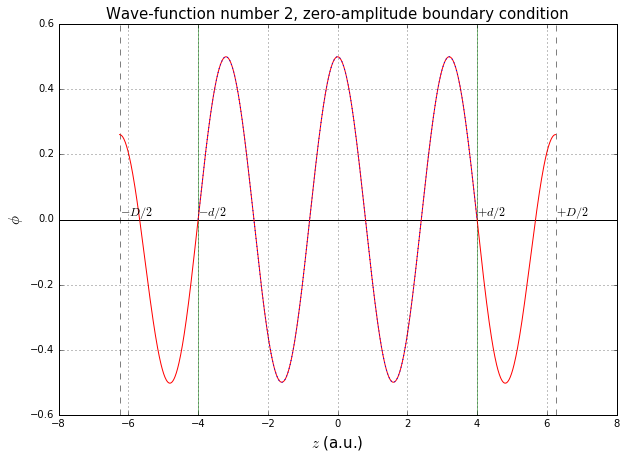

In [4]:
n_psi=int(raw_input('Number of embedded wave-function to plot? '))
# plotting
n_plot=1000
coeff=eigen[n_psi][1]
z_list=np.linspace(-D/2,D/2,n_plot)
z_sub=np.linspace(-d/2,d/2,n_plot)
factor=np.sign(conf.wave_function(coeff,0))
psi=np.array([conf.wave_function(coeff,z) for z in z_list])
plt.rcParams['figure.figsize']=10,7
plt.grid(True)
plt.axhline(color='black')
plt.axvline(x=-D/2,color='black',ls='dashed',lw=0.5)
plt.axvline(x=D/2,color='black',ls='dashed',lw=0.5)
plt.axvline(x=-d/2,color='green',lw=0.5)
plt.axvline(x=d/2,color='green',lw=0.5)
plt.text(-D/2,0.01,'$-D/2$',fontsize=12)
plt.text(D/2,0.01,'$+D/2$',fontsize=12)
plt.text(-d/2,0.01,'$-d/2$',fontsize=12)
plt.text(d/2,0.01,'$+d/2$',fontsize=12)
plt.xlabel('$z$ (a.u.)',fontsize=15)
plt.ylabel('$\phi$',fontsize=15)
plt.title('Wave-function number '+str(n_psi)+', zero-amplitude boundary condition',fontsize=15)
plt.plot(z_list,factor*psi,'r-',z_sub,conf.exact(n_psi,z_sub),'b:')

The red line plots the eigenfunction of the embedded Hamiltonian for $-D/d \le z \le +D/2$,
and the dashed black line the exact wave-function for $-d/2 \le z \le +d/2$. The vertical green lines mark $z=\pm d/2$, and the vertical dashed lines $z=\pm D/2$.  
You *should* see that the embedded wave-function and the exact wave-function are in excellent agreement in region I. The embedded wave-function has no physical meaning outside region I, and if we increase the number of basis-functions there is no convergence for $|z| \gt d/2$. As we suggest in section 5.1, this variational freedom *outside* region I may be the reason why the method works so well (see also figure 5.3). Note that the embedded wave-function is normalized to unity in region I.

Setting $\mathcal{V}$, hence $\Sigma$, very large forces the embedded wave-functions to (nearly) satisfy the zero-amplitude boundary condition on $S$. Setting $\Sigma=0$ makes the embedded wave-functions satisfy the zero-derivative boundary condition (sections 3.4.1, 5.5). We can illustrate this using the same programs, with just the change in `v`:

In [5]:
v,d,D,n_max=0.0,8.0,12.5,10 # v=0 here, for zero-derivative boundary condition 
param=[v,d,D,n_max]
n_print=6 # number of eigenvalues printed. n_print should not be > n_max.
eigen=conf.hamiltonian(param)
print 'Eigenvalues of zero-derivative square well'
print '      embed      exact'
try:
    for n in range(n_print):
        if v==0.0:
            exact_energy=0.5*(2.0*n*np.pi/d)**2
        else:
            exact_energy=0.5*((2.0*n+1)*np.pi/d)**2
        print '%3d %9.6f %9.6f' % (n,eigen[n][0],exact_energy)
except:
    print 'n_print > n_max. Try again.'

Eigenvalues of zero-derivative square well
      embed      exact
  0  0.000000  0.000000
  1  0.308425  0.308425
  2  1.233701  1.233701
  3  2.775826  2.775826
  4  4.934802  4.934802
  5  7.710629  7.710628


As above, the next cell pauses until you enter the response to the raw_input question   
`Number of embedded wave-function to plot?`  

Number of embedded wave-function to plot? 2


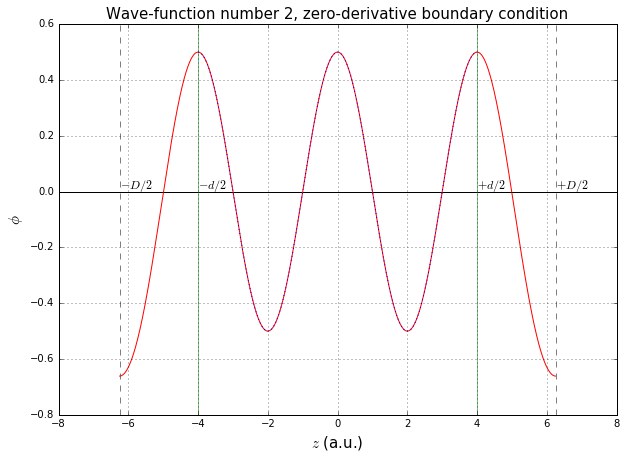

In [6]:
n_psi=int(raw_input('Number of embedded wave-function to plot? '))
# plotting
n_plot=1000
coeff=eigen[n_psi][1]
z_list=np.linspace(-D/2,D/2,n_plot)
z_sub=np.linspace(-d/2,d/2,n_plot)
factor=np.sign(conf.wave_function(coeff,0))
psi=np.array([conf.wave_function(coeff,z) for z in z_list])
plt.rcParams['figure.figsize']=10,7
plt.grid(True)
plt.axhline(color='black')
plt.axvline(x=-D/2,color='black',ls='dashed',lw=0.5)
plt.axvline(x=D/2,color='black',ls='dashed',lw=0.5)
plt.axvline(x=-d/2,color='green',lw=0.5)
plt.axvline(x=d/2,color='green',lw=0.5)
plt.text(-D/2,0.01,'$-D/2$',fontsize=12)
plt.text(D/2,0.01,'$+D/2$',fontsize=12)
plt.text(-d/2,0.01,'$-d/2$',fontsize=12)
plt.text(d/2,0.01,'$+d/2$',fontsize=12)
plt.xlabel('$z$ (a.u.)',fontsize=15)
plt.ylabel('$\phi$',fontsize=15)
plt.title('Wave-function number '+str(n_psi)+', zero-derivative boundary condition',fontsize=15)
plt.plot(z_list,factor*psi,'r-',z_sub,conf.exact(n_psi,z_sub),'b:')

Compare the behaviour of the wave-function at $z=\pm d/2$ with the previous figure!
We shall return to the zero-derivative boundary condition later on.  
At first glance it seems that the zero-derivative eigenvalues converge to the exact values faster than the zero-amplitude. However, we should remember that in the "zero-amplitude" case the embedding problem corresponds to a very large, but finite, potential in region II, whereas the exact results correspond to an infinite potential outside the well.

## Free electron confined in a quadrant
<img src=quadrant.png width=350 height=350 />
As a less trivial example we consider a free electron confined in two-dimensions to the quarter-circle, radius $R$, as shown above. Outside this region, bounded by the red lines, there is a very large potential $\mathcal{V}$. This problem was treated using embedding by [Crampin *et al.*](http://dx.doi.org/10.1103/PhysRevB.51.7318) (S. Crampin, M. Nekovee, and J.E. Inglesfield, Phys. Rev. B **51** 7318-7320 (1995)): the confining embedding potential $\Sigma$ is added along the boundary, and within region I the wave-functions are expanded using the basis functions,
$$\chi_{pq}(x,y)=\sin(p\pi x/R)\sin(q\pi y/R).$$
Here $p$ and $q$ are integers, varying from 1 to $N$, so taking the origin at the bottom left-hand corner of the quadrant the basis functions satisfy the boundary condition that $\chi_i=0$ on the straight sides of the quadrant.  
The input parameters are `V`, `R` and `N` for the external potential $\mathcal{V}$, the radius $R$, and the number of basis functions $N$ in each direction (the total number of basis functions is $N^2$). For typical values we may take $V=1\times 10^5$, $R=1$ and $N=6$, but these can of course be varied (don't make $N$ too large as the number of overlap and Hamiltonian integrals to be evaluated varies as $N^4$).

In [7]:
V,R,N = 8.0e4,1.0,6 #confining potential, radius, number of basis functions in each direction

Next we call the function `quadrant_matrices` in the module `confinement`. This sets up the Hamiltonian and overlap matrix elements for the problem, evaluated by two-dimensional integration over region I, and one-dimensional integration round the quadrant boundary for the matrix elements of the embedding potential. As the evaluation of the matrix elements can be time-consuming, after every $5\times N^2$ integrals a message is printed out, just to reassure you that the program is proceeding satisfactorily! Be patient while running the next cell, as it can take time a little time till the first message appears. After evaluating the matrix elements, the first `n_print` energy-ordered eigenvalues are printed out. The parameter `n_print` can be varied as you wish, but it must be less than $N^2$.

In [8]:
param=[V,R,N]
n_print=5 #number of eigenvalues to be printed.
eigen=conf.quadrant_matrices(param)
print '%s %.2f' % ('Eigenvalues of quadrant, radius', R)
for i in range(n_print):
    print '%2d %10.6f' % (i,eigen[i])

Number of integrals done =   1 x  36
Number of integrals done =   6 x  36
Number of integrals done =  11 x  36
Number of integrals done =  16 x  36
Number of integrals done =  21 x  36
Number of integrals done =  26 x  36
Number of integrals done =  31 x  36
Number of integrals done =  36 x  36
Number of integrals done =  36 x  36
Eigenvalues of quadrant, radius 1.00
 0  13.332284
 1  29.773782
 2  35.768089
 3  51.149154
 4  63.226284


These energies can be compared with exact results, as the eigenstates of the quadrant are
$$\psi(r,\phi)=J_m(kr)\sin(m\phi),$$
where $k$ is determined by $J_m(kR)=0$, and $m=2,4,6,\ldots$ Labelling the zeros of the Bessel function of order $m$ by $j_{m,s}$, the energies of an electron confined to the quadrant of radius $R$ are given by
$$E_{m,s}=\frac{j_{m,s}^2}{2R^2},\quad m=2,4,6,\ldots$$
We can easily look up the zeros, hence the exact energies, but it is more amusing to calculate them within Python, using the `scipy.special.jn_zeros` function.

In [9]:
k=np.zeros((8,8))
for m in range(8):
    k[m,]=jn_zeros(2*(m+1),8)
k=np.array(sorted(k.flatten(order='C')))
E=0.5*k*k
print '      Exact    Embedding'
for i in range(n_print):
    print '%2d %10.6f %10.6f' % (i,E[i],eigen[i])

      Exact    Embedding
 0  13.187308  13.332284
 1  28.791470  29.773782
 2  35.424999  35.768089
 3  49.363136  51.149154
 4  61.213898  63.226284


The convergence properties of the embedding method for the quadrant are discussed in Crampin *et al*., and compared with the results of [Brownstein](http://dx.doi.org/10.1103/PhysRevLett.71.1427) (K.R. Brownstein, Phys. Rev. Lett. **71** 1427-1430 (1993)), who had previously calculated the eigenstates. (Note that in table III of Brownstein the energies are given, inconsistently, in Rydbergs rather than Hartree atomic units, and hence are wrong by a factor of 2.)

## Section 5.2 Confined H atom
We now turn to a more testing example, and one which has physical relevance, a H atom inside a confining sphere. This problem has been looked at by many workers (see section 5.2 for references), and can be regarded as a model of an impurity atom in a quantum dot. The embedding approach was described in [Crampin *et al.*](http://dx.doi.org/10.1103/PhysRevB.51.7318) (S. Crampin, M. Nekovee, and J.E. Inglesfield, Phys. Rev. B **51** 7318-7320 (1995)). 

<img src=confined_atom.png width=400 height=400 />

The geometry of the problem is shown in this figure, with the H atom displaced by $a$ from the centre of the sphere, radius $r_0$. Over the surface of the sphere $S$ we require the wave-functions to be (nearly) zero, by adding a confining embedding potential over $S$. We use two spherical polar coordinate systems, one centred on the sphere with polar angle $\vartheta$ and radius $r$, and the other centred on the H atom with coordinates $\hat{\vartheta}$ and $\hat{r}$; the azimuthal angle $\phi$ is the same in both. The relationship between the coordinates is
$$\hat{r}=\sqrt{a^2+r^2-2ar\cos\vartheta},\quad \cos\hat{\vartheta}=\frac{r\cos\vartheta-a}{\hat{r}}.$$
The basis functions (eq. 5.11), following [Brownstein](http://dx.doi.org/10.1103/PhysRevLett.71.1427) (K.R. Brownstein, Phys. Rev. Lett. **71** 1427-1430 (1993)), are given by
$$u_m(\hat{r},\hat{\vartheta})=e^{-\hat{r}}\hat{r}^\alpha\cos^\beta\hat{\vartheta},\quad \alpha,\beta=0,\ldots,N-1,\quad m=(\alpha,\beta).$$
We evaluate the kinetic and potential energy matrix elements in the Hamiltonian, and the overlap matrix elements, by integrating through the sphere, using the $(\hat{r},\hat{\vartheta})$ coordinates. This simplifies the kinetic energy term (evaluated as in eq. (2.28)), and simplifies the singularity in the hydrogenic potential, $-1/\hat{r}$. The function `vol_integrand` in the module `confinement.py` gives the energy integrand, and `ovlp_integrand` the overlap integrand. For a given value of $\hat{\vartheta}$, the limit of the $\hat{r}$ integral (that is, the surface of the sphere), is given by
$$\hat{r}_\textrm{max}=-a\cos\hat{\vartheta}+\sqrt{r_0^2-a^2\sin^2\hat{\vartheta}}.$$
The Hamiltonian matrix element integrations are performed in the function `ham_matrix`, using the Scipy function `dblquad`, and the overlap integrations carried out in `overlap_matrix`.  
The matrix elements of the embedding potential, given by integrating over $S$, are evaluated using the $(r,\vartheta)$ coordinates. The values of the basis functions at $(r=r_0,\vartheta)$ are evaluated using the equations given above to find $(\hat{r},\hat{\vartheta})$. The integrand is given in `surf_integrand` in `confinement.py`, and the integration over $\vartheta$ is performed in `ham_matrix` using Scipy `quad`.  
Finally, the eigenvalues of the embedded Hamiltonian are evaluated in `displaced_H_eigenvalues` in the `confinement.py` module, returned to the notebook.

The input parameters are `v`, `ro`, `d`, and `nn` for the confining potential $\mathcal{V}$, the radius of the confining sphere $r_0$, the displacement $a$, and the range of $\alpha$ and $\beta$, $N$. The number of basis functions is $N^2$. The values used in table 5.2 are  
`v, r0, a = 1.8e+9, 3.0, 0.5`, with `nn` varying between 2 and 6, but of course these can be changed as you wish. Atomic units are used throughout.

In [10]:
v,r0,a,nn=1.8e+9,2.0,1.0,6 #confining potential, sphere radius, H displacement, no. basis fns.

We next find the energy-ordered eigenvalues of the system.

In [11]:
param=[v,r0,a,nn]
energy=conf.displaced_H_eigenvalues(param)
print 'Eigenvalues of confined and displaced H atom (a.u.)'
print 'Confining radius = %.3f, displacement = %.3f, confining potential = %.3e'%(r0,a,v)
for i in range(min(nn*nn,5)):
    print '%2i %12f' % (i,energy[i])

Eigenvalues of confined and displaced H atom (a.u.)
Confining radius = 2.000, displacement = 1.000, confining potential = 1.800e+09
 0     0.127501
 1     1.428378
 2     3.152231
 3     4.086676
 4     5.230549


Published results for the ground state energy of the confined H atom include the following (to read this properly you may need GitHub Flavored Markdown on your web browser):

$r_0$ | $a=0.1$ | $a=0.5$ | $a=1.0$ | reference
----|----|----|----|----
4.0 a.u.|-0.48315|-0.48102|-0.47342|Brownstein
4.0     |-0.48318|-0.48107|-0.47344|Diamond
3.0     |-0.42358|-0.41392|-0.37840|Brownstein
3.0     |-0.42358|-0.41389|-0.37841|Diamond
2.0     |-0.12286|-0.06889|+0.12751|Brownstein 
2.0     |-0.12285|-0.06889|+0.12752|Diamond

[Brownstein](http://dx.doi.org/10.1103/PhysRevLett.71.1427): K.R. Brownstein, Phys. Rev. Lett. **71** 1427-1430 (1993)  
[Diamond](http://iopscience.iop.org/0953-4075/24/17/005): J.J. Diamond, P.L. Goodfriend, and S. Tsonchev, J. Phys. B **24** 3669-3684 (1991) 

You should find excellent agreement with these published results. 

## Section 5.4 Nanostructures
### Circular corner
The embedded method for confined systems provides an efficient way of calculating electron transport through various nanostructures, such as the electron waveguide with a kink shown in figure 5.5. Here we shall look at the wave-functions and densities of states for such structures, reserving tranport for a later notebook. We begin with a two-dimensional circular corner in a waveguide, studied by [Dix and Inglesfield](http://iopscience.iop.org/0953-8984/10/26/018) (E. Dix and J.E. Inglesfield, J. Phys. Condens. Matter **10** 5923-5941 (1998)):
<img src=circular_corner.png width=400 height=400 />
The right-angle corner has inner and outer radii of $r_1$ and $r_2$, joining infinite straight waveguides. The region we treat explicitly, region I, is bounded by the quarter circles, coloured red, on which we apply the confining embedding potential $\Sigma=\sqrt{\mathcal{V}/2}$, and the junctions with the straight sections, coloured blue, on which we apply different boundary conditions depending on the problem. For the calculations we take the coordinate origin at the corner of the green-dashed square, of side $D$. Relative to this origin, indicated by the small black circle, we take basis functions given by
$$\chi_{pq}(x,y)=\cos(p\pi x/D)\cos(q\pi y/D),\quad p,q=0,1,2, \ldots $$
with $D>r_2$. These basis functions have zero derivative on the sides of the green-dashed square, and consequently the required flexibility of boundary conditions over the boundaries of region I.

As a first study of the circular corner, we shall calculate the bound states with the zero derivative boundary condition on the junctions with the straight waveguides, which we obtain by setting $\Sigma=0$ over the blue lines. The combination of zero derivative (Neumann) over the blue sections of the boundary of region I and zero amplitude (Dirichlet) over the red sections is a good example of the mixed boundary conditions discussed in section 5.5 of the book. The input parameters are the confining potential outside region I, $\mathcal{V}$, the inner and outer radii of the corner, $r_1$ and $r_2$, the parameter defining the basis functions, $D$, and the number of basis functions in each direction, $N$, so that the total number of basis functions is $N^2$. These are set in the following cell as `V`, `r1`, `r2`, `D` and `N` respectively. Typical values are $V=1\times 10^5$, $r1=0.2$, $r_2=1.2$, $D=1.5$ and $N=8$, but when you vary these, don't use too large a value for $N$ unless you are prepared to wait a long time for all the matrix elements to be evaluated.

In [3]:
# Confining potential, inner and outer radii, parameter defining basis functions, and
# number of basis functions in each direction:
V,r1,r2,D,N = 1.0e5,0.2,1.2,1.5,8  

We call the function `corner_matrices` in the module `confinement` to set up the Hamiltonian, overlap and embedding matrix elements, just as for the quadrant. The function returns the energy-sorted eigenvalues, which are printed out, and the normal coefficients of the corresponding eigenvectors. Two additional parameters which can be changed at this stage are `n_print`, the number of eigenvalues printed out, and `n_plot`, the number of mesh points in each direction when we plot the wave-functions.

In [4]:
param=V,r1,r2,D,N
n_print=5 # number of eigenvalues to be printed
n_plot=50 # plotxy_values=np.linspace(0.0,r2,n_plot)
ham,ovlp,al,be=conf.corner_matrices(param)
eigen=conf.corner_eigenvalues(ham,ovlp)
print '%s %.2f %s %.2f' %('Eigenvalues of circular corner, inner radius =',r1,\
'outer radius =',r2) 
for i in range(n_print):
    print '%2d %10.6f' % (i,eigen[i][0])

Number of integrals done =   1 x  64
Number of integrals done =   6 x  64
Number of integrals done =  11 x  64
Number of integrals done =  16 x  64
Number of integrals done =  21 x  64
Number of integrals done =  26 x  64
Number of integrals done =  31 x  64
Number of integrals done =  36 x  64
Number of integrals done =  41 x  64
Number of integrals done =  46 x  64
Number of integrals done =  51 x  64
Number of integrals done =  56 x  64
Number of integrals done =  61 x  64
Number of integrals done =  64 x  64
Eigenvalues of circular corner, inner radius = 0.20 outer radius = 1.20
 0   4.568543
 1   9.308155
 2  19.170627
 3  19.938185
 4  25.989551


These can be compared with Dix and Inglesfield, where the convergence with the basis set size is shown for the case of $r_1=0.2$, $r_2=1.2$, as well as the exact values which we discuss below.  
To plot a particular wave-function, you should type its eigenvalue number in response to the raw_input question, `Number of embedded wave-function to plot?`, which appears in the next cell (note that you can make repeated plots by running the cell again and again). If you want to save the figure to a file, uncomment the last line, substituting whatever file-name and format you wish.

Number of wave-function to plot? 2


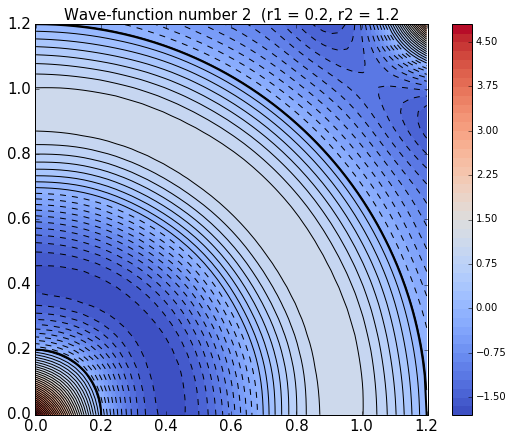

In [5]:
n_psi=int(raw_input('Number of wave-function to plot? '))
# sets up plot
xy_values=np.linspace(0.0,r2,n_plot)
X,Y=np.meshgrid(xy_values,xy_values)
coeff=eigen[n_psi][1]
Z=conf.corner_plot(X,Y,coeff,pi*al/D,pi*be/D)
plt.figure(figsize=(8.8,7))
plt.axis('equal')
plt.contourf(X,Y,Z,50,cmap='coolwarm')
plt.colorbar()
plt.contour(X,Y,Z,50,colors='black',linewidth=0.3)
x_values=np.linspace(0.0,r2,200)
plt.plot(x_values,sqrt(r2*r2-x_values*x_values),linewidth=2.0,\
         color='black')
x_values=np.linspace(0.0,r1,200)
plt.plot(x_values,sqrt(r1*r1-x_values*x_values),linewidth=2.0,\
         color='black')
plt.tick_params(labelsize=15)
plt.title('Wave-function number '+str(n_psi)+'  (r1 = '+str(r1)+\
          ', r2 = '+str(r2),fontsize=15)
#plt.savefig('wave-fn.pdf') # saves figure to file (you can change file name)

In this contour plot, the solid black arcs show the circular corner itself, along which the confining embedding potential is applied. Even with a fairly small basis set, the wave-function goes to zero close to these lines. In the plot, remember that the wave-function outside region I, here in the top right-hand and bottom left-hand corners, is meaningless, and it is only within region I that it converges as the basis set increases in size (a good example of this is shown in figure 5.6). The solid contours indicate positive values and the dashed lines negative; the colour scale spans the entire range of the plot, so the boundary between warm (reddish) colours and cool (bluish) colours shading doesn't coincide with $\phi(x,y)=0$ (see the colour-bar at the right of the figure).  
The exact solutions for this problem are given by
$$\psi(r,\phi)=[J_m(kr)+\alpha Y_m(kr)]\cos(m\phi),\quad m=0,2,4,6\ldots,$$
where $J_m$ and $Y_m$ are the Bessel functions of order $m$ which are regular and irregular at the origin, and $\alpha$ and $k$ are determined by $\psi(r_1,\phi)=0$, $\psi(r_2,\phi=0$. The allowed wave-vectors $k$, hence the energies $E=k^2/2$, are then given by solutions of the equation,
$$J_m(kr_1)-\frac{J_m(kr_2)Y_m(kr_1)}{Y_m(kr_2)}=0.$$
We solve this equation by calling fsolve in the scipy.optimize library: you will be prompted for the azimuthal quantum number $m$, which you can see from the plot, and an estimate of the energy, for which you can use the embedding value.

In [10]:
m=int(raw_input('m value? '))
E0=float(raw_input('trial energy? '))
k0=sqrt(2.0*E0)
E=0.5*fsolve(conf.corner_exact,k0,m)**2
print '%s %.2f %.2f %s %i %s %10.6f' % ('Corner radii = ',r1,r2,' m = ',m,' exact energy =',E)

m value? 0
trial energy? 19
Corner radii =  0.20 1.20  m =  0  exact energy =  19.313976


### Density of states of circular corner
The density of states of electrons in a kink is discussed in section 5.5.2, and here we shall calculate the density of states of the circular corner, using the same methods. The embedding potentials which describe the straight waveguides are given in equation 5.31, and
are added over the blue lines in the figure. Thus the embedding potential on the left-hand side of the corner is given by
$$\Sigma(\tilde{y},\tilde{y}')=-\frac{\textrm{i}}{w}\sum_p k_p\sin(p\pi\tilde{y}/w)\sin(p\pi\tilde{y}'/w),$$
where $\tilde{y},\tilde{y}'$ are the $y$-coordinates relative to $(x,y)=(0,r_1)$ (the bottom of the waveguide junction), $w$ is the width of the waveguide, and the sum is over the waveguide channels $p$. $k_p$ is the outgoing wavevector in the $p$th channel, given at energy $(E+\textrm{i}\eta)$ (5.30) by
$$k_p=\sqrt{2(E+\textrm{i}\eta)-p^2\pi^2/w^2}.$$
The first step is to construct the matrix elements of $\sin(p\pi\tilde{y}/w)\sin(p \pi\tilde{y}'/w)$ between our basis functions, and this is done in the next cell. We must choose `n_emb`, the number of channels, and a typical value would be `n_emb=10`.

In [7]:
n_emb=10
emb_int=conf.corner_embed_matrices(n_emb)

 
In the following cell we call `corner_green` in the `confinement` module, which calculates the embedded Green function in the corner and then evaluates the local density of states integrated through region I, the corner density of states  $n_\mathrm{I}(E)$. For this calculation we input the energy range, between `en_start` and `en_end`, the number of energy points `number_en`, and the imaginary part of the energy `eta` (as in section 5.5.2). We can also vary the range of $n_\textrm{I}$ which is plotted, by changing the parameter `dos_range`.

[19.0, 21.0, 0.0, 2.0]

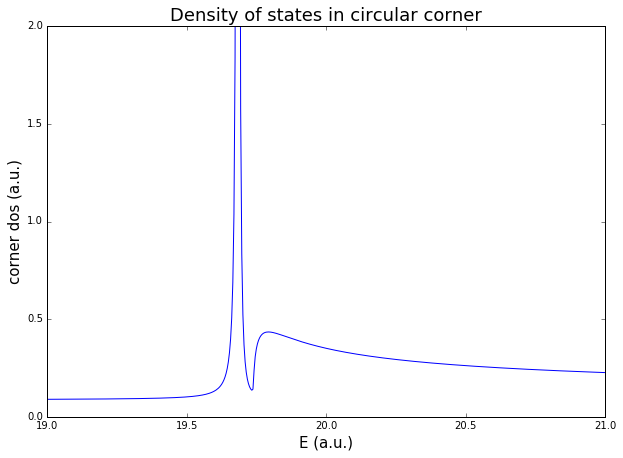

In [9]:
en_start, en_end, number_en, eta = 19.0, 21.0, 500, 0.001 # energy range and imaginary energy
dos_range=2.0   # range of density of states plot
lds=[]
elist=np.linspace(en_start,en_end,number_en)
for energy in elist:
    lds.append([conf.corner_green(energy,eta,emb_int,ham,ovlp,n_emb,al,be)])
plt.figure(figsize=(10,7))
plt.xlabel('E (a.u.)',fontsize=15)
plt.ylabel('corner dos (a.u.)',fontsize=15)
plt.title('Density of states in circular corner',fontsize=18)
plt.plot(elist,lds)
plt.axis([en_start,en_end,0.0,dos_range])

The continuum density of states is zero below the threshold energy for propagation in the lowest mode of the straight waveguides,
$$E_\mathrm{threshold}=\frac{1}{2}\frac{\pi^2}{w^2},\quad w=r_2-r_1,$$
but there is a bound state just below the first threshold (compare with figure 5.13). Below subsequent thresholds, the bound states mix with the continuum and become resonances. The density of states above each threshold shows the rounded-off $(E-E_0)^{-1/2}$ behaviour which is also seen in the one-dimensional density of states at surfaces (as in figure 2.5, for example). 
We raise the interesting question in footnote 3 to chapter 5 - why *does* the corner pull off bound states? 